# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    if city not in cities:
        cities.append(city)

len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}&q="

units = "imperial"

City = []
Latitude = []
Longitude = []
Temperature = []
Humidity = []
Cloudiness = []
Windspeed = []
Country = []
Date = []

records = 0
sets = 1
print('''-----------------
Beginning Data Retrieval
-------------------------''')
for city in cities:
    response = requests.get(url + city).json()
    try:
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
        Temperature.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Windspeed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        if records > 48:
            records = 1
            sets += 1
            City.append(city)
        else:
            records += 1
            City.append(city)
        print(f"Processing Record {records} or Set {sets} | {city}")
    except:
        print(f"City not found. Skipping...")
print('''--------------------
Data Retrieval Complete
-------------------------''')


------------------------------
Beginning Data Retrieval
------------------------------
Processing Record 1 or Set 1 | cerritos
Processing Record 2 or Set 1 | sitka
Processing Record 3 or Set 1 | hermanus
Processing Record 4 or Set 1 | tateyama
Processing Record 5 or Set 1 | kapaa
Processing Record 6 or Set 1 | colonia
Processing Record 7 or Set 1 | yellowknife
Processing Record 8 or Set 1 | ixtapa
Processing Record 9 or Set 1 | rikitea
Processing Record 10 or Set 1 | jamestown
Processing Record 11 or Set 1 | buenos aires
Processing Record 12 or Set 1 | itamarandiba
Processing Record 13 or Set 1 | punta arenas
City not found. Skipping...
Processing Record 14 or Set 1 | moose factory
Processing Record 15 or Set 1 | kavaratti
Processing Record 16 or Set 1 | jiwani
Processing Record 17 or Set 1 | brae
Processing Record 18 or Set 1 | lekoni
Processing Record 19 or Set 1 | chuy
Processing Record 20 or Set 1 | tuktoyaktuk
Processing Record 21 or Set 1 | upernavik
Processing Record 22 or Set 1

Processing Record 41 or Set 4 | malindi
City not found. Skipping...
City not found. Skipping...
Processing Record 42 or Set 4 | vao
Processing Record 43 or Set 4 | puri
Processing Record 44 or Set 4 | hambantota
Processing Record 45 or Set 4 | moree
Processing Record 46 or Set 4 | myitkyina
Processing Record 47 or Set 4 | namatanai
Processing Record 48 or Set 4 | lorengau
Processing Record 49 or Set 4 | gornopravdinsk
Processing Record 1 or Set 5 | batemans bay
Processing Record 2 or Set 5 | tiarei
Processing Record 3 or Set 5 | sao joao da barra
Processing Record 4 or Set 5 | bethel
Processing Record 5 or Set 5 | east london
Processing Record 6 or Set 5 | paredon
City not found. Skipping...
Processing Record 7 or Set 5 | mantua
Processing Record 8 or Set 5 | marinette
Processing Record 9 or Set 5 | lisakovsk
Processing Record 10 or Set 5 | tazovskiy
Processing Record 11 or Set 5 | belaya gora
City not found. Skipping...
Processing Record 12 or Set 5 | nouadhibou
Processing Record 13 o

Processing Record 30 or Set 8 | inhambane
Processing Record 31 or Set 8 | las lomas
Processing Record 32 or Set 8 | purranque
Processing Record 33 or Set 8 | kiama
Processing Record 34 or Set 8 | aketi
Processing Record 35 or Set 8 | coruripe
Processing Record 36 or Set 8 | zhigansk
Processing Record 37 or Set 8 | albufeira
Processing Record 38 or Set 8 | mago
Processing Record 39 or Set 8 | mahibadhoo
Processing Record 40 or Set 8 | juneau
Processing Record 41 or Set 8 | yar-sale
Processing Record 42 or Set 8 | mizdah
Processing Record 43 or Set 8 | melville
Processing Record 44 or Set 8 | twentynine palms
Processing Record 45 or Set 8 | avera
Processing Record 46 or Set 8 | puerto del rosario
Processing Record 47 or Set 8 | natal
Processing Record 48 or Set 8 | puerto princesa
Processing Record 49 or Set 8 | ambulu
Processing Record 1 or Set 9 | sembakung
Processing Record 2 or Set 9 | manavalakurichi
Processing Record 3 or Set 9 | bud
Processing Record 4 or Set 9 | itum-kale
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(len(City))

552


In [6]:
weather_df=({'City':City,'Lat':Latitude,'Lng':Longitude,'Humidity':Humidity,'Max Temp':Temperature,'Cloudiness':Cloudiness,'Windspeed':Windspeed,'Country':Country,'Date':Date})
weatherinfo_df=pd.DataFrame(weather_df)
weatherinfo_df.head()

,City,Lat,Lng,Humidity,Max Temp,Cloudiness,Windspeed,Country,Date
0,cerritos,33.8583,-118.0648,35,80.60,0,6.91,US,1644720607
1,sitka,57.0531,-135.3300,81,40.89,75,4.61,US,1644720607
2,hermanus,-34.4187,19.2345,80,66.90,65,3.91,ZA,1644720608
3,tateyama,34.9833,139.8667,87,46.67,100,3.44,JP,1644720608
4,kapaa,22.0752,-159.3190,68,79.12,40,13.80,US,1644720608


In [7]:
weatherinfo_df.describe()

,Lat,Lng,Humidity,Max Temp,Cloudiness,Windspeed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,20.059713,16.208457,73.400362,50.012862,58.581522,7.289239,1.644721e+09
std,33.356120,90.374884,20.438501,31.204658,40.394253,5.111690,8.765439e+01
min,-54.800000,-175.200000,10.000000,-32.780000,0.000000,0.000000,1.644720e+09
25%,-8.622700,-63.794725,65.000000,30.622500,12.750000,3.440000,1.644721e+09
50%,22.912100,23.067400,77.000000,60.565000,75.000000,5.970000,1.644721e+09
75%,48.719375,93.575000,89.000000,75.467500,100.000000,10.360000,1.644721e+09
max,78.218600,179.316700,100.000000,97.830000,100.000000,36.130000,1.644721e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

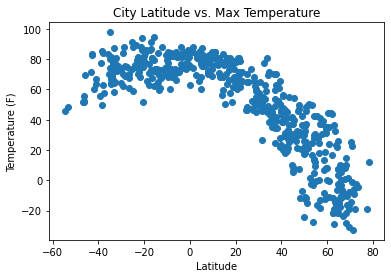

In [8]:
plt.scatter(weatherinfo_df["Lat"], weatherinfo_df["Max Temp"], marker="o")

plt.title(f'City Latitude vs. Max Temperature')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("../output_data/lat_temp.png", dpi=100, facecolor='w')

plt.show()

In [ ]:
# The lower the lat the warmer the weather, the higher the lat the colder the weather. The most optimal weather conditions are in the middle. 

## Latitude vs. Humidity Plot

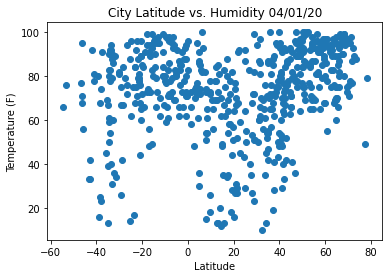

In [9]:
plt.scatter(weatherinfo_df["Lat"], weatherinfo_df["Humidity"], marker="o")

plt.title(f"Latitude vs. Humidity 04/01/20')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("../output_data/lat_humidity.png", dpi=100, facecolor='w')

plt.show()

In [ ]:
#There is no relationship between city lat and humidity

## Latitude vs. Cloudiness Plot

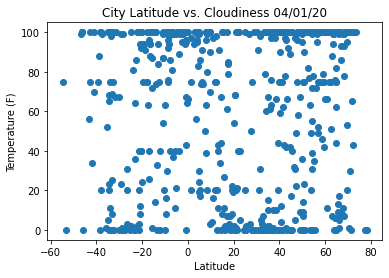

In [10]:
plt.scatter(weatherinfo_df["Lat"], weatherinfo_df["Cloudiness"], marker="o")

plt.title(f'City Latitude vs. Cloudiness 04/01/20')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("../output_data/lat_cloudiness.png", dpi=100, facecolor='w')

plt.show()

In [ ]:
#There is no correlation between city lat and cloudiness

## Latitude vs. Wind Speed Plot

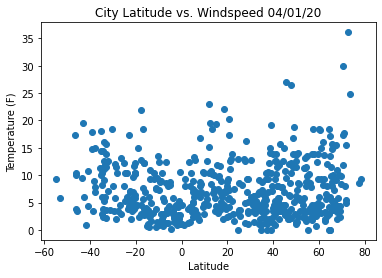

In [11]:
plt.scatter(weatherinfo_df["Lat"], weatherinfo_df["Windspeed"], marker="o")

plt.title(f'City Latitude vs. Windspeed 04/01/20')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("../output_data/lat_windspeed.png", dpi=100, facecolor='w')

plt.show()

In [ ]:
#The windspeed in most cities is under 25 miles per hour

## Linear Regression

In [62]:
north_df = weatherinfo_df.loc[weatherinfo_df["Lat"] >= 0 , :]
south_df = weatherinfo_df.loc[weatherinfo_df["Lat"] < 0 , :]

south_df.head()

,City,Lat,Lng,Humidity,Max Temp,Cloudiness,Windspeed,Country,Date
2,hermanus,-34.4187,19.2345,80,66.90,65,3.91,ZA,1644720608
8,rikitea,-23.1203,-134.9692,68,79.52,0,17.29,PF,1644720609
10,buenos aires,-34.6132,-58.3772,50,64.13,0,10.36,AR,1644720446
11,itamarandiba,-17.8572,-42.8589,99,62.73,100,2.82,BR,1644720610
12,punta arenas,-53.1500,-70.9167,76,48.31,0,5.75,CL,1644720577


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

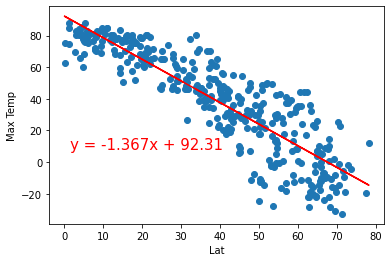

The -value is: -0.8747669270393688


In [53]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.5,8),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.savefig("../output_data/ntemp_lat.png", dpi=100, facecolor='w')
plt.show()
print(f"The -value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

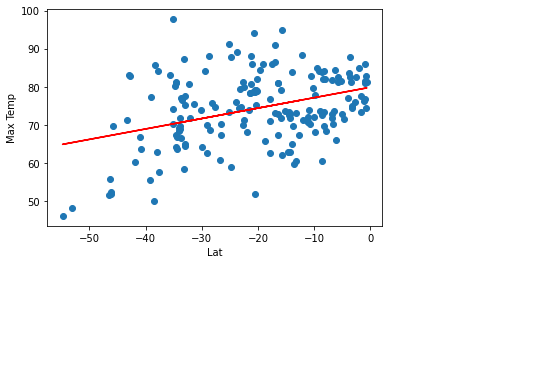

The -value is: 0.370245623327545


In [64]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.5,8),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.savefig("../output_data/stemp_lat.png", dpi=100, facecolor='w')
plt.show()
print(f"The -value is: {rvalue}")

In [ ]:
#The temp decreases as the latitude increases while the temp inscreases as the latitdue gets closer to 0

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

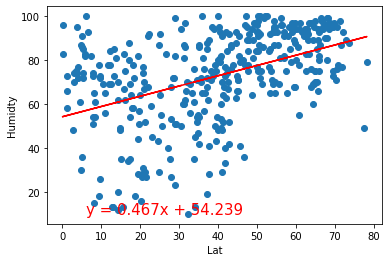

The -value is: 0.4447622149429276


In [65]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidty')
plt.savefig("../output_data/nhumidity_lat.png", dpi=100, facecolor='w')
plt.show()
print(f"The -value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

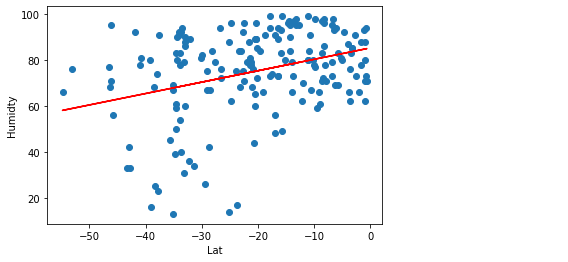

The -value is: 0.3356111498902033


In [66]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidty')
plt.savefig("../output_data/shumidity_lat.png", dpi=100, facecolor='w')
plt.show()
print(f"The -value is: {rvalue}")

In [ ]:
#Humidity is slightly affected as the lat increases

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

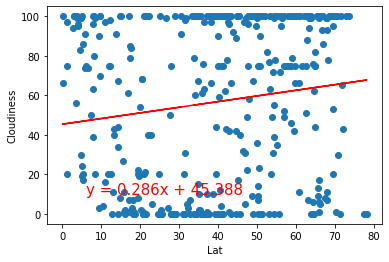

The -value is: 0.13999718690973206


In [67]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.savefig("../output_data/ncloud_lat.png", dpi=100, facecolor='w')
plt.show()
print(f"The -value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

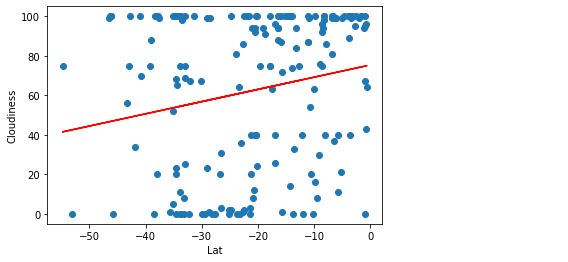

The -value is: 0.20409513389137773


In [68]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.savefig("../output_data/ncloud_lat.png", dpi=100, facecolor='w')
plt.show()
print(f"The -value is: {rvalue}")

In [ ]:
#As the lat increses there is a slight increase in cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

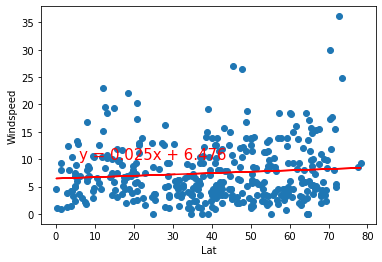

The -value is: 0.09356864082822809


In [69]:
x_values = north_df['Lat']
y_values = north_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Windspeed')
plt.savefig("../output_data/nwind_lat.png", dpi=100, facecolor='w')
plt.show()
print(f"The -value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

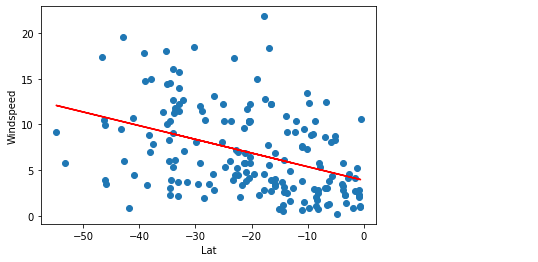

The -value is: -0.4105874063913686


In [70]:
x_values = south_df['Lat']
y_values = south_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Windspeed')
plt.savefig("../output_data/swind_lat.png", dpi=100, facecolor='w')
plt.show()
print(f"The -value is: {rvalue}")

In [ ]:
# there is little correlation between windspeed and the lat